### 루브릭

**1. GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.**
   - 오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지를 생성하였다.
   
**2. 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.**
   - gif를 통해 생성이미지 품질이 서서히 향상되는 것과, fake accuracy가 추세적으로 0.5를 향해 하향하고 있음을 확인하였다.
   
**3. 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.**
   - 제출 아이디어를 제출 프로젝트에 반영하고, 그 결과가 아이디어 적용 이전보다 향상되었음을 시각적으로 입증하였다.

### 작업환경 구성

In [2]:
! pip install imageio
! pip install Pillow

In [5]:
# 폴더생성
# $ mkdir -p ~/aiffel/dcgan_newimage/cifar10/generated_samples
# $ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_checkpoints
# $ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_history

In [113]:
#라이브러리 설정
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.2.0


### 데이터셋 구성하기

In [59]:
#내장 데이터셋 불러오기(cifar10)
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape, test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [60]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [61]:
#학습에 사용할 train_x의 이미지를 [-1, 1]로 정규화
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

train_x.shape, test_x.shape

max pixel: 1.0
min pixel: -1.0


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [62]:
print(type(train_x))
print(type(test_x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [63]:
print ("Training data:")
print ("Number of examples: ", train_x.shape[0])
print ("Number of channels:",train_x.shape[3]) 
print ("Image size:", train_x.shape[1], train_x.shape[2])
print
print ("Test data:")
print ("Number of examples:", test_x.shape[0])
print ("Number of channels:", test_x.shape[3])
print ("Image size:", test_x.shape[1], test_x.shape[2])

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


In [72]:
train_x = train_x.reshape(train_x.shape[0],32,32,3).astype('float32')
train_x.shape

(50000, 32, 32, 3)

In [73]:
test_x = test_x .reshape(test_x .shape[0],32,32,3).astype('float32')
test_x .shape

(10000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


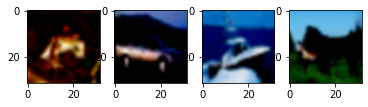

In [74]:
plt.subplot(141)
plt.imshow(train_x[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(train_x[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(train_x[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(train_x[12], interpolation="bicubic")
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

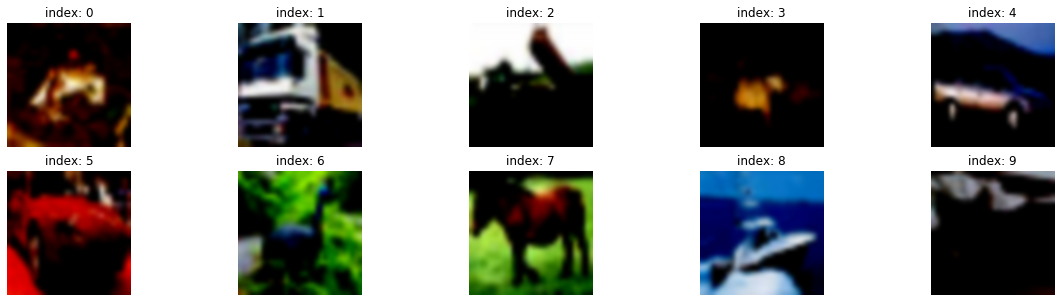

In [75]:
plt.figure(figsize=(20, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i],interpolation="bicubic")
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 59924 is out of bounds for axis 0 with size 50000

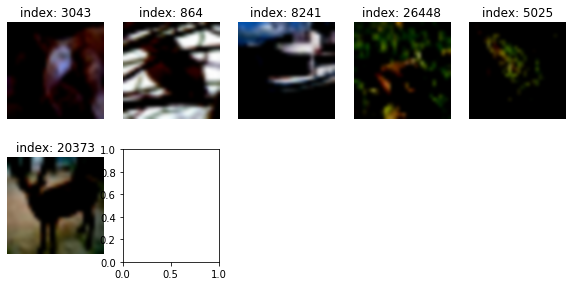

In [76]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index],interpolation="bicubic")
    plt.title(f'index: {random_index}')
    plt.axis('off')

plt.show()

In [78]:
#tf.data.Dataset 모듈의 fromtensorslices() 함수를 사용하여 
#미니배치 데이터셋을 구성
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### 생성자 모델 구현

In [81]:
#(32, 32, 3)의 shape를 가진 이미지를 생성하는 생성자 모델 구현 함수를 작성
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [82]:
generator = make_generator_model()

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)        

In [84]:
#noise = tf.random.normal([1, 100])로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지를 생성
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

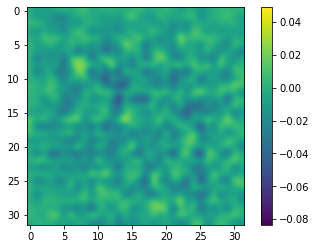

In [85]:
#생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인
plt.imshow(generated_image[0, :, :, 0],interpolation="bicubic")
plt.colorbar()
plt.show()

###  판별자 모델 구현

In [89]:
#(32, 32, 3)의 이미지를 입력으로 받아 
#1dim을 판별결과를 출력하는 판별자 모델 구현 함수를 작성
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [90]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [91]:
#위에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00163958]], dtype=float32)>

### 손실함수와 최적화 함수 구현

In [92]:
#생성자와 판별자의 손실함수(loss)를 구현
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [95]:

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [96]:
#판별자의 출력값을 가지고 
#실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수를 구현
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [97]:
#생성자와 판별자를 최적화하는 optimizer를 정의
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### 훈련과정 상세 기능 구현

In [ ]:
#1개 미니배치의 훈련 과정을 처리하는 train_step() 함수를 구현
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [ ]:
#16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 generate_and_save_images() 함수를 구현
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0],interpolation="bicubic")
        plt.axis('off')

    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [127]:
#훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 
#draw_train_history() 함수를 구현

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [128]:
#training_checkpoints 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### 학습 과정 진행

In [129]:
#구현한 기능들을 활용하여 최소 50 epoch만큼의 모델 학습을 진행
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [130]:
#학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [138]:
#학습 과정을 담은 샘플 이미지, gif 파일, 학습 진행 그래프 이미지를 함께 제출
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif

-rw-r--r-- 1 aiffel aiffel 35849  2월 25 23:48 /home/aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif


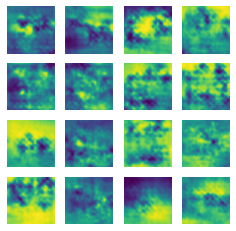

Time for training : 529 sec


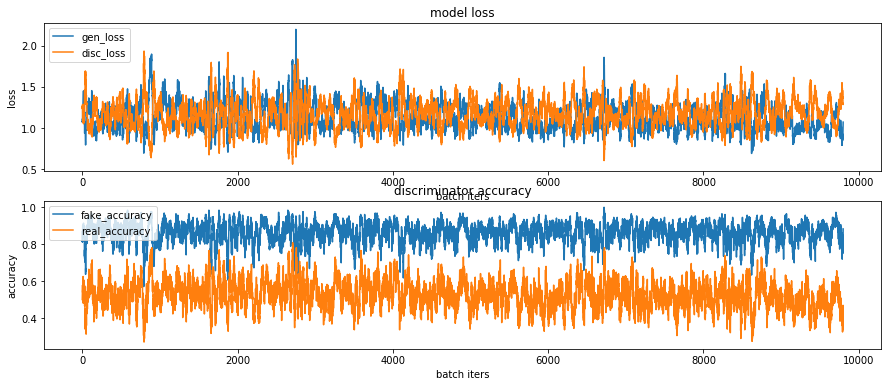

In [132]:
#학습 시작
train(train_dataset, EPOCHS, save_every)

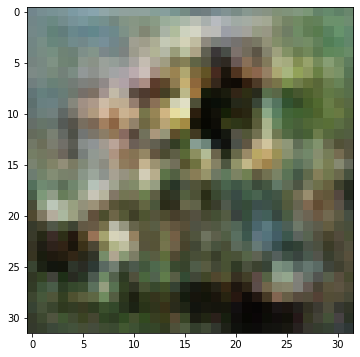

In [137]:
#checkpoint 모듈 
#이를 이용해 학습해 둔 모델을 로드하면 모델 재학습이 필요 없이 
#추가 epoch진행 및 추가 이미지 생성이 가능 

checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것

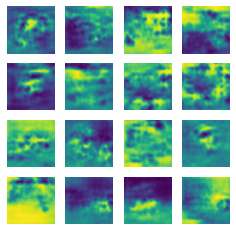

Time for training : 539 sec


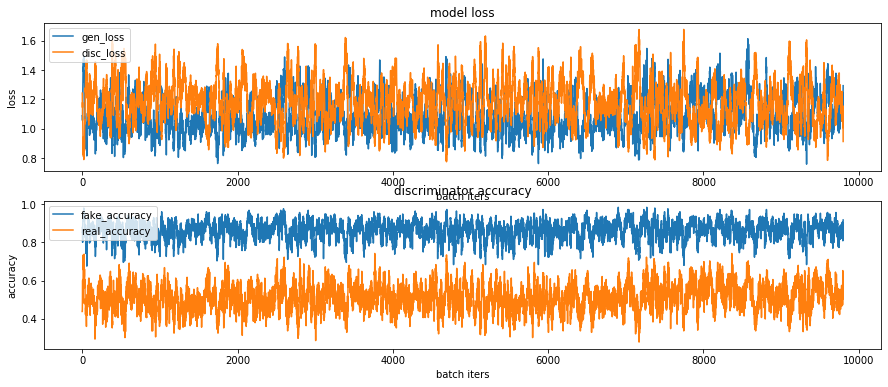

In [135]:
#모델 로드후 훈련 재개 코드
#%%time
train(train_dataset, EPOCHS, save_every)

### GAN 훈련 과정 개선
- How to Train a GAN? Tips and tricks to make GANs work  
https://github.com/soumith/ganhacks  
- 10 Lessons I Learned Training GANs for one Year  
https://towardsdatascience.com/10-lessons-i-learned-training-generative-adversarial-networks-gans-for-a-year-c9071159628  
- Tips for Training Stable Generative Adversarial Networks  
https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/  
- Improved Techniques for Training GANs(paper)  
https://papers.nips.cc/paper/2016/file/8a3363abe792db2d8761d6403605aeb7-Paper.pdf

In [ ]:
#생성된 샘플 이미지, 학습 과정 그래프 등을 통해 이전 훈련 과정의 문제점을 분석

In [ ]:
#모델구조 또는 학습 과정을 개선한 내역과 
#그 결과(샘플 이미지, 학습 과정 그래프 포함)를 함께 제출

### 회고
- 이번 프로젝트에서 **어려웠던 점,**
    - 생성자와 판별자 모델의 세부적인 구성을 이해하는 과정이 어려웠습니다
    - 흑백 이미지에서 컬러이미지로 바뀌면서 변경해야하는 숫자나 옵션들에 대한 이해가 없어서 어려웠습니다 (단순히 흑백채널인 1에서 컬러채널(rgb) 3으로 변경해주는것 만으로 적용이 안되는 현상이 있었습니다.
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
    - 생성자와 판별자의 실시간 라인그래프로 학습이 잘 이루어지고 있는지 직관적으로 이해할 수는 있지만, 코드상의 구현에 있어서 모델의 구성이 한번에 파악되지 않습니다
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
    - 육안으로 식별 가능한 이미지를 생성하기 위해 체크포인트 모듈을 활용하여 50 에폭 단위로 학습을 추가로 진행하였으나, 색 표현에 있어서 온전하지 못한 이미지를 만들어 내고 있습니다.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
    - train history img를 보면 체크포인트를 활용한 훈련재개시 생성되는 그래프가초기화 되는것으로 보아 이전학습 정보를 정상적으로불러오지 못하고 있는것 같습니다.
    - 생성되는 과정의 이미지와 cifar10으로 생성된 이미지를 불러왔을때 생성되는 과정에서는 색영역이 특정 색으로 편향되어 있는것으로보아 아마도 모델의 레이어 설계단계에서 3채널인 컬러이미지에 맞는 옵션으로 변경해주지 못한 부분이 있을것 같습니다.
- **자기 다짐**
    - 훈련과정 개선 링크를 통해 이후에도 지속적으로 모델을 개선시켜보는 실습을 해보고싶습니다.
    - 고해상도의 이미지를 다루는 방법은 어떤것이 있는지, 그리고 모바일 환경에서 이러한 이미지 생성 어플리케이션이 작동 가능한지도 공부해보고 싶습니다.
    